In [1]:
from src import *

In [2]:
file_name = 'transfered_siamese_model_Isaac'
# file_name = 'naive_siamese_model_Isaac'

siamese_model = make_siamese_model(make_embedding())
siamese_model.load_weights(os.path.join(SAVED_MODEL_PATH, f"{file_name}.h5"))

In [3]:
# results = verify(siamese_model,ver_path=r'C:\Users\xafra\Documents\2A\Cassiopée\b\RFTL2\data\verification_demo')
results = get_verify_result(siamese_model,ver_path=ANC_PATH)
mean, median, min, max = np.mean(results), np.median(results), np.min(results), np.max(results)
print(f"Mean score :\t{mean}\nMedian score :\t{median}\nMinimum score :\t{min}\nMaximum score :\t{max}")
first_quartile, third_quartile = np.quantile(results, 0.25), np.quantile(results, 0.75)
print(f"First quartile :\t{first_quartile}\nThird quartile :\t{third_quartile}")

Verifying 25 data.
Mean score :	0.4986986517906189
Median score :	0.5195026993751526
Minimum score :	0.3111463487148285
Maximum score :	0.6126804351806641
First quartile :	0.45630067586898804
Third quartile :	0.547254204750061


After many observations, one can observe the usual values of the third quartile $q^{(3)}$ of the result vector, depending on the input as such:
For corresponding pictures $q^{(3)}_{positive} \lesssim 0.50$, while for differing pictures $q^{(3)}_{negative} \gtrsim 0.55$. Hence we arbitrarily set the verification threshold at $q^{(3)}_{threshold} \simeq 0.55$.

In [4]:
VERIFICATION_THRESHOLD = 0.55

In [5]:
k,m = 0,0

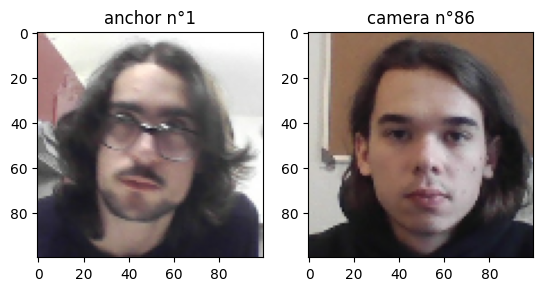

[Single verification] Gross result : 0.25829678773880005	Validation : False
Verifying 25 data.
[Multiple verification] Gross result : 0.2323748916387558	Validation : False


In [6]:
anc_path = ANC_PATH
ver_path = r'C:\Users\xafra\Documents\2A\Cassiopée\b\RFTL2\data\verification_demo'
k+=1
m-=1
k %= len(os.listdir(anc_path)); m %= len(os.listdir(ver_path))

#   preprocess
anchor_file_path = os.path.join(anc_path, os.listdir(anc_path)[k])
verify_file_path = os.path.join(ver_path, os.listdir(ver_path)[m])
test_input = np.array(preprocess(anchor_file_path))
test_val = np.array(preprocess(verify_file_path))

#   Display pictures and print results
plot_images_b2b(test_input, test_val, title1=f"anchor n°{k}", title2=f"camera n°{m}")

result = siamese_model.predict([np.array([test_input]), np.array([test_val])])
print(f"[Single verification] Gross result : {np.mean(result)}\tValidation : {np.mean(result) > VERIFICATION_THRESHOLD}")
quartile_result = verify(siamese_model, verify_file_path, anc_path)
print(f"[Multiple verification] Gross result : {quartile_result}\tValidation : {quartile_result > VERIFICATION_THRESHOLD}")

In [7]:
LIVE_PATH = os.path.join('data', 'live')
live_file_path = os.path.join(LIVE_PATH, 'input_image.jpg')

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        cv2.imwrite(live_file_path, frame)
        plt.figure()
        
        # Run verification
        quartile_result = verify(siamese_model, live_file_path)
        print(f"[Multiple verification] Gross result : {quartile_result}\tValidation : {quartile_result > VERIFICATION_THRESHOLD}")
        os.system('cls')
        img = preprocess(live_file_path)
        fig, ax1 = plt.subplots(1, 1)
        ax1.imshow(img)
        ax1.set_title("Live reaction")
        plt.show()
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()